# Loading the data

data is from https://www.federalreserve.gov/econres/feds/the-us-treasury-yield-curve-1961-to-the-present.htm

## Loading full dataset

In [1]:
from __future__ import print_function, division   # Ensures Python3 printing & division standard
import pandas as pd 
from pandas import Series, DataFrame 
from matplotlib import pyplot as plt
import numpy as np

SavePlots = False

In [2]:
import pandas as pd

# Skip the first 9 rows
data = pd.read_csv('../Final-Project-AppML/feds200628.csv', skiprows=9)

# Show the first 5 rows of the resulting dataframe
data.head(5)


,Date,BETA0,BETA1,BETA2,BETA3,SVEN1F01,SVEN1F04,SVEN1F09,SVENF01,SVENF02,...,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30,TAU1,TAU2
0,1961-06-14,3.917606,-1.277955,-1.949397,0.0,3.8067,3.9562,NaN,3.5492,3.8825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339218,-999.99
1,1961-06-15,3.978498,-1.257404,-2.247617,0.0,3.8694,4.0183,NaN,3.5997,3.9460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.325775,-999.99
2,1961-06-16,3.984350,-1.429538,-1.885024,0.0,3.8634,4.0242,NaN,3.5957,3.9448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.348817,-999.99
3,1961-06-19,4.004379,-0.723311,-3.310743,0.0,3.9196,4.0447,NaN,3.6447,3.9842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.282087,-999.99
4,1961-06-20,3.985789,-0.900432,-2.844809,0.0,3.8732,4.0257,NaN,3.5845,3.9552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310316,-999.99


## Removing non-essential rows and columns

In [3]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter rows where Date is on or after 1985-01-02
data1 = data[data['Date'] >= '1985-01-02']

# Optional: check the result
data1.head()


,Date,BETA0,BETA1,BETA2,BETA3,SVEN1F01,SVEN1F04,SVEN1F09,SVENF01,SVENF02,...,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30,TAU1,TAU2
6145,1985-01-02,11.833172,-4.078431,-617.564405,620.832652,11.1608,12.5602,12.3404,10.1920,11.3976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.183248,2.183435
6146,1985-01-03,11.967238,-4.169920,-617.777654,620.619446,11.1536,12.4338,12.3620,10.2197,11.3545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.181257,2.179797
6147,1985-01-04,12.049434,-4.354115,-617.725058,620.671900,11.2057,12.4703,12.4150,10.2513,11.4123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.173992,2.171873
6148,1985-01-07,11.960591,-4.299825,-617.803915,620.593354,11.1201,12.2761,12.2690,10.1968,11.3032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.159062,2.156195
6149,1985-01-08,11.861243,-4.192519,-617.794508,620.602735,11.0820,12.2177,12.1834,10.1686,11.2611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.142931,2.140394


In [4]:
# List of columns to keep always
cols_to_keep = ['Date', 'BETA0', 'BETA1', 'BETA2']

# Select columns that start with 'SVENPY'
svenpy_cols = [col for col in data.columns if col.startswith('SVENPY')]

# Combine all columns to keep
all_keep_cols = cols_to_keep + svenpy_cols

# Filter the dataframe to keep only these columns
data2 = data1[all_keep_cols]

# Check the result
data2.head()


,Date,BETA0,BETA1,BETA2,SVENPY01,SVENPY02,SVENPY03,SVENPY04,SVENPY05,SVENPY06,...,SVENPY21,SVENPY22,SVENPY23,SVENPY24,SVENPY25,SVENPY26,SVENPY27,SVENPY28,SVENPY29,SVENPY30
6145,1985-01-02,11.833172,-4.078431,-617.564405,9.3058,10.1846,10.7399,11.0937,11.3222,11.4724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6146,1985-01-03,11.967238,-4.169920,-617.777654,9.3534,10.2063,10.7325,11.0636,11.2775,11.4201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6147,1985-01-04,12.049434,-4.354115,-617.725058,9.3305,10.2187,10.7583,11.0936,11.3082,11.4508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6148,1985-01-07,11.960591,-4.299825,-617.803915,9.2907,10.1575,10.6742,10.9906,11.1917,11.3254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6149,1985-01-08,11.861243,-4.192519,-617.794508,9.2774,10.1326,10.6426,10.9546,11.1525,11.2833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualization mutlidimensionally
Tries to perform PCA

In [6]:
variables = data2.columns
print(variables.values)

# benchmark_data  = data['nnbjet']
print("  Variables in data: ", variables.values)

['Date' 'BETA0' 'BETA1' 'BETA2' 'SVENPY01' 'SVENPY02' 'SVENPY03'
 'SVENPY04' 'SVENPY05' 'SVENPY06' 'SVENPY07' 'SVENPY08' 'SVENPY09'
 'SVENPY10' 'SVENPY11' 'SVENPY12' 'SVENPY13' 'SVENPY14' 'SVENPY15'
 'SVENPY16' 'SVENPY17' 'SVENPY18' 'SVENPY19' 'SVENPY20' 'SVENPY21'
 'SVENPY22' 'SVENPY23' 'SVENPY24' 'SVENPY25' 'SVENPY26' 'SVENPY27'
 'SVENPY28' 'SVENPY29' 'SVENPY30']
  Variables in data:  ['Date' 'BETA0' 'BETA1' 'BETA2' 'SVENPY01' 'SVENPY02' 'SVENPY03'
 'SVENPY04' 'SVENPY05' 'SVENPY06' 'SVENPY07' 'SVENPY08' 'SVENPY09'
 'SVENPY10' 'SVENPY11' 'SVENPY12' 'SVENPY13' 'SVENPY14' 'SVENPY15'
 'SVENPY16' 'SVENPY17' 'SVENPY18' 'SVENPY19' 'SVENPY20' 'SVENPY21'
 'SVENPY22' 'SVENPY23' 'SVENPY24' 'SVENPY25' 'SVENPY26' 'SVENPY27'
 'SVENPY28' 'SVENPY29' 'SVENPY30']


In [8]:
# Aiming to plot by components and firstly removing NaN's
# Size before removing NaNs
original_size = data2.shape[0]

# Remove rows with any NaN values
data_clean = data2.dropna()

# Size after removing NaNs
cleaned_size = data_clean.shape[0]

print(f"Original size of data2: {original_size} rows")
print(f"Size after removing NaNs (data_clean): {cleaned_size} rows")
# Removing 678 days

Original size of data2: 10528 rows
Size after removing NaNs (data_clean): 9850 rows


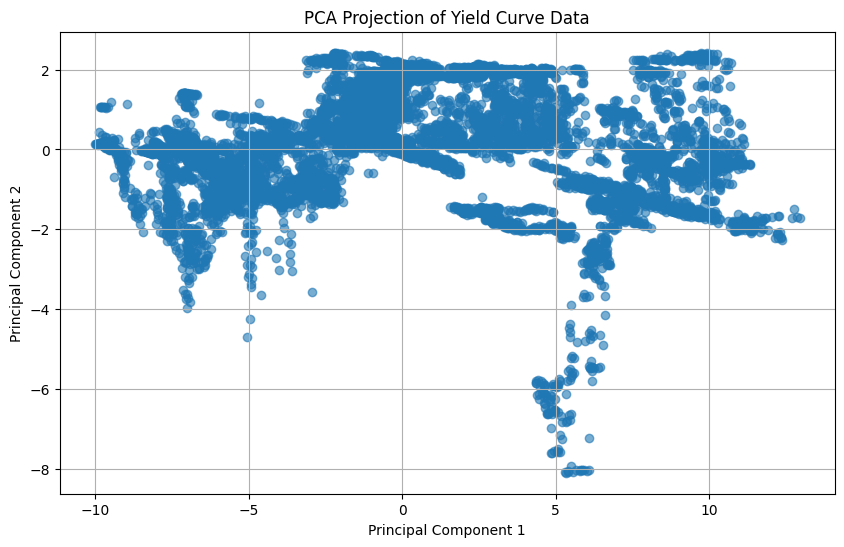

In [9]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Drop the 'Date' column (not numerical)
data_num = data_clean.drop(columns=["Date"])

# Step 2: Standardize the numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_num)

# Step 3: Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

# Step 5: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Yield Curve Data")
plt.grid(True)
plt.show()


2025-05-19 15:22:28.362537: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/miniconda3/envs/appml_p_25/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/miniconda3/envs/appml_p_25/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


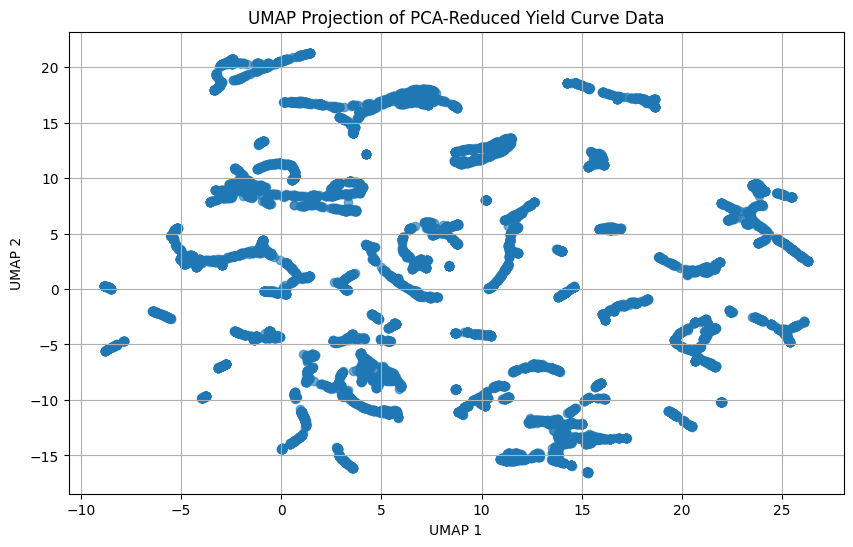

In [10]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt

# Step 2: Drop non-numeric columns
X = data_clean.drop(columns=["Date"])

# Step 3: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: PCA to 10 components (denoise and compress)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Step 5: UMAP on PCA result
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_pca)

# Step 6: Plot UMAP projection
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.6)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("UMAP Projection of PCA-Reduced Yield Curve Data")
plt.grid(True)
plt.show()


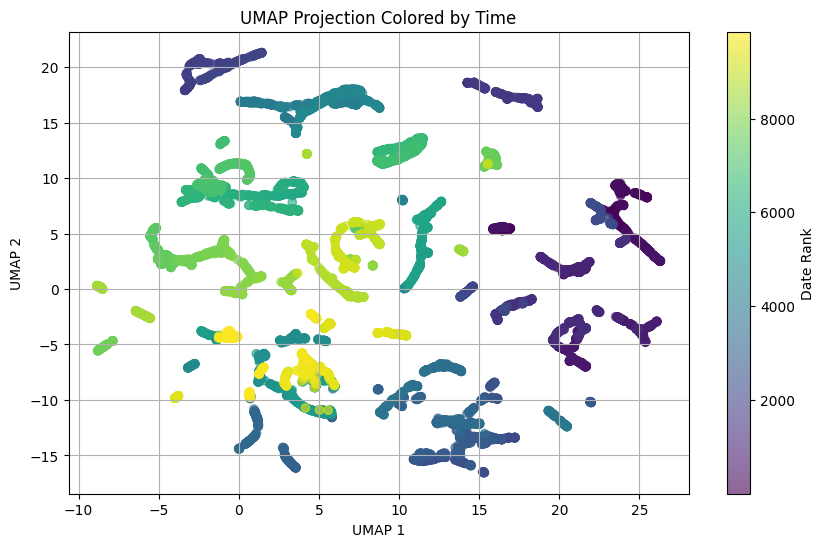

In [11]:
import matplotlib.dates as mdates

dates = pd.to_datetime(data_clean["Date"])
color = dates.rank().values  # or use dates.astype('int64') for fine-grained mapping

plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=color, cmap='viridis', alpha=0.6)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("UMAP Projection Colored by Time")
plt.colorbar(label="Date Rank")
plt.grid(True)
plt.show()


## Model gymnastics

In [12]:
# first guess coder
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Prepare your data
data_clean = data2.dropna().drop(columns=["Date"])  # Drop NaNs and Date
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_clean)

# Step 2: Define autoencoder architecture
input_dim = X_scaled.shape[1]

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(4, activation='relu')(encoded)  # Bottleneck

# Decoder
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

# Model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Step 3: Train the autoencoder
history = autoencoder.fit(
    X_scaled, X_scaled,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.7644 - val_loss: 0.1689
Epoch 2/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1031 - val_loss: 0.0656
Epoch 3/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0593 - val_loss: 0.0658
Epoch 4/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0671 - val_loss: 0.0601
Epoch 5/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0411 - val_loss: 0.0447
Epoch 6/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0189 - val_loss: 0.0378
Epoch 7/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0113 - val_loss: 0.0367
Epoch 8/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0099 - val_loss: 0.0342
Epoch 9/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0079 - val_loss: 0.0340
Epoch 10/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0075 - val_loss: 0.0327
Epoch 11/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0072 - val_loss: 0.0318
Epoch 12/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

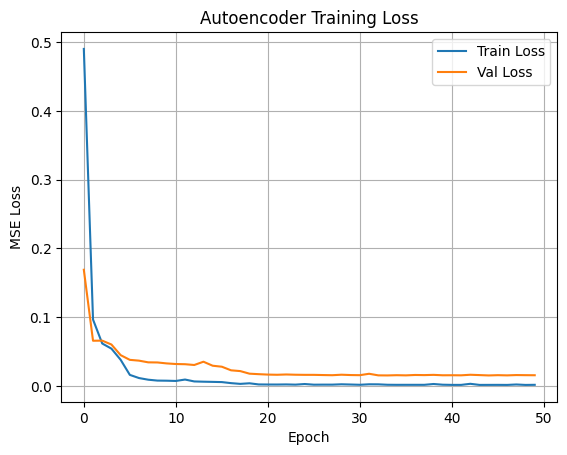

In [13]:
#Visualizing training loss
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Autoencoder Training Loss")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Attempt to reconstruct

X_reconstructed = autoencoder.predict(X_scaled)

# Compute reconstruction error
reconstruction_error = np.mean((X_scaled - X_reconstructed)**2, axis=1)

# Optional: Flag high-error rows as anomalies
threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold


308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


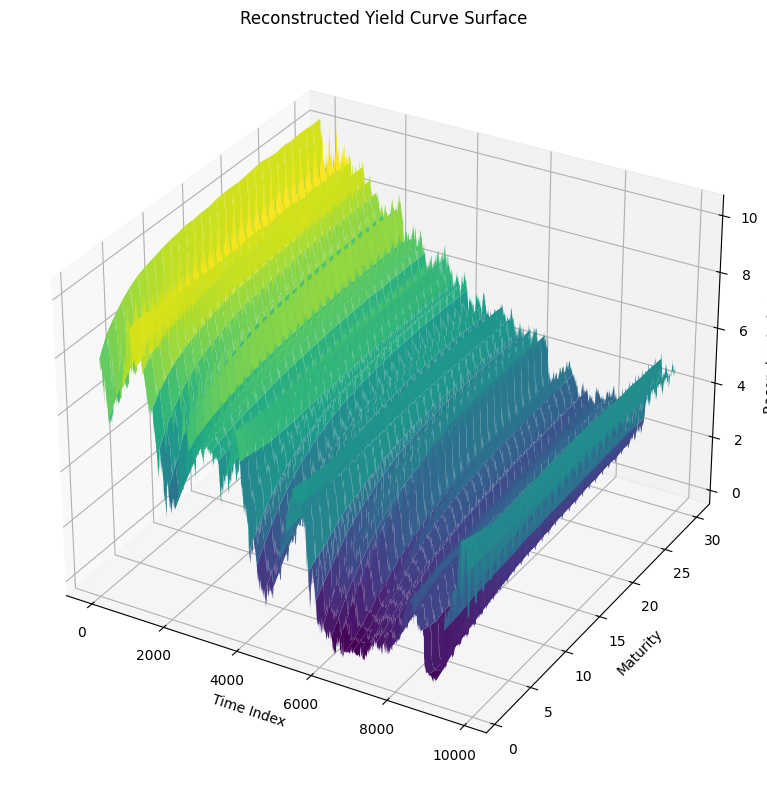

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Inverse transform to original scale
X_reconstructed_original = scaler.inverse_transform(X_reconstructed)

# Step 2: Recreate DataFrame from reconstruction
# Use the same columns that were input to the autoencoder
reconstructed_df = pd.DataFrame(X_reconstructed_original, columns=X.columns)

# Step 3: Extract maturity columns (assumes SVENPY01 to SVENPY30)
maturity_cols = [col for col in reconstructed_df.columns if col.startswith("SVENPY")]
maturity_cols_sorted = sorted(maturity_cols, key=lambda x: int(x.replace("SVENPY", "")))

# Step 4: Create meshgrid for plotting
X_time = np.arange(len(reconstructed_df))  # Use row index as time
Y_maturities = np.array([int(col.replace("SVENPY", "")) for col in maturity_cols_sorted])
Z_yields = reconstructed_df[maturity_cols_sorted].values

X_mesh, Y_mesh = np.meshgrid(X_time, Y_maturities, indexing='ij')

# Step 5: Plot 3D surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X_mesh, Y_mesh, Z_yields, cmap='viridis')

ax.set_xlabel('Time Index')
ax.set_ylabel('Maturity')
ax.set_zlabel('Reconstructed Yield')
ax.set_title('Reconstructed Yield Curve Surface')

plt.tight_layout()
plt.show()